In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets

digits = datasets.load_digits()

In [4]:
X = digits.data
y = digits.target.copy()

In [5]:
y[digits.target == 9] = 1
y[digits.target != 9] = 0

In [6]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=666)

In [7]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [8]:
log_reg.fit(X_train,y_train)

c:\programdata\anaconda3\envs\zyc\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [9]:
decision_scores = log_reg.decision_function(X_test)

In [24]:
from PlayML.Metrics import FPR,TPR

fprs = []
tprs = []
thresholds = np.arange(np.min(decision_scores),np.max(decision_scores), 0.1)

In [25]:
for threshold in thresholds:
    y_predict = np.array(decision_scores >= threshold ,dtype='int')
    fprs.append(FPR(y_test,y_predict))
    tprs.append(TPR(y_test,y_predict))

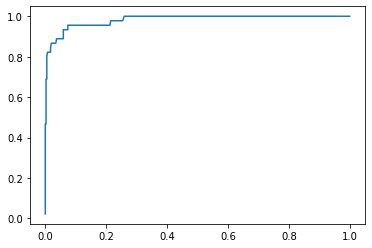

In [26]:
plt.plot(fprs,tprs)

### scikit-learn中的ROC

In [27]:
from sklearn.metrics import roc_curve

fprs,tprs,thresholds = roc_curve(y_test,decision_scores)

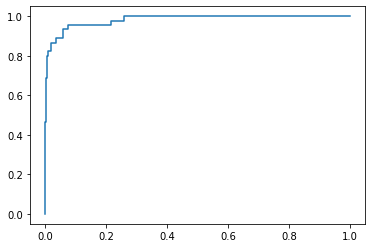

In [28]:
plt.plot(fprs,tprs)

In [29]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,decision_scores)


0.9823868312757201